In [2]:
setwd("/projects/CARDIPS/analysis/epigenome_resource")
source("analyses/jennifer/notebooks/functions.R")


In [3]:
tissues = c("iPSC", "CVPC", "PPC")
analyses = c("eqtls", "caqtls", "haqtls")

In [4]:
plotlist = list()

In [13]:
sourcedata = list()

In [22]:
for (analysis in analyses)
{
    for (tiss in tissues)
    {
        message(paste(tiss, analysis))

        config_file = paste(analysis, tiss, "notebooks/qtl.config.sh", sep = "/")

        if (file.exists(config_file) == T)
        {
            source(paste(analysis, "scripts/functions.R", sep = "/"))
            opt = list(config = config_file)# change with optparse

            config_file   = opt$config
            config = parse_config(config_file)

            peer_file        = paste(config$out_folder, "step_1", "phenotype", "peer.factors.txt", sep = "/")
            cov_sample_file  = paste(config$out_folder, "input", "full.metadata_sample.txt", sep = "/")
            cov_subject_file = paste(config$out_folder, "input", "full.metadata_subject.txt", sep = "/")

            message(paste("Reading:", peer_file       ), appendLF = F)
            message(paste("Reading:", cov_sample_file ), appendLF = F)
            message(paste("Reading:", cov_subject_file), appendLF = F)

            peer = add_rownames(fread(peer_file, data.table = F))
            cov_sample = fread(cov_sample_file, data.table = F)
            cov_subject = fread(cov_subject_file, data.table = F)

            cov = merge(cov_sample, cov_subject, by = c("phenotype_id", "genotype_id", "subject_id")) 

            if ("total_filt" %in% colnames(cov)) { colnames(cov)[which(colnames(cov) == "total_filt")] = "PF"     }
            if ("cTnT" %in% colnames(cov)) { colnames(cov)[which(colnames(cov) == "cTnT")] = "ctnt"     }
            if ("pdx1_nkx6.1" %in% colnames(cov)) { colnames(cov)[which(colnames(cov) == "pdx1_nkx6.1")] = "D15_PDX1_NKX6.1"     }

            assay_columns = list("eqtls" = c("PF", "pct_mapped" ,  "pct_duplicates", "pct_intergenic_bases", "GPC1", "GPC2", "GPC3", "GPC4", "GPC5", "sex"),
                                 "caqtls" = c("PF", "pct_mapped", "GPC1", "GPC2", "GPC3", "GPC4", "GPC5", "sex", "nrf", "pbc1", "pbc2", "tn5_frip", "tsse"),
                                 "haqtls" = c("PF", "GPC1", "GPC2", "GPC3", "GPC4", "GPC5", "sex", "nrf", "pbc1", "pbc2", "nsc", "rsc"))

            if (tiss == "iPSC")
            {
                if ("passage" %in% colnames(cov)) { colnames(cov)[which(colnames(cov) == "passage")] = "ipsc_passage" }
                cov = cov[, c("phenotype_id", assay_columns[[analysis]], "ipsc_passage")]
                cov$ipsc_passage = as.numeric(gsub("P", "", cov$ipsc_passage))

            } else if (tiss == "CVPC")
            {
                print(c("phenotype_id", assay_columns[[analysis]], "ipsc_passage_at_monolayer", "ctnt")[which(!c("phenotype_id", assay_columns[[analysis]], "ipsc_passage_at_monolayer", "ctnt") %in% colnames(cov))])
                cov = cov[, c("phenotype_id", assay_columns[[analysis]], "ipsc_passage_at_monolayer", "ctnt")]

            } else if (tiss == "PPC")
            {
                print(c("phenotype_id", assay_columns[[analysis]], "ipsc_passage_at_monolayer", "D15_PDX1_NKX6.1")[which(!c("phenotype_id", assay_columns[[analysis]], "ipsc_passage_at_monolayer", "D15_PDX1_NKX6.1") %in% colnames(cov))])
                cov = cov[, c("phenotype_id", assay_columns[[analysis]], "ipsc_passage_at_monolayer", "D15_PDX1_NKX6.1")]
                cov$ipsc_passage_at_monolayer = as.numeric(gsub("P", "", cov$ipsc_passage_at_monolayer))
            }

            cov = add_rownames(cov) 
            colnames(cov)[which(colnames(cov) == "PF")] = "Reads Passing Filters"
            colnames(cov)[which(colnames(cov) == "PF")] = "Percent Mapped Reads"
            colnames(cov)[which(colnames(cov) == "GPC1")] = "Genotype PC1"
            colnames(cov)[which(colnames(cov) == "GPC2")] = "Genotype PC2"
            colnames(cov)[which(colnames(cov) == "GPC3")] = "Genotype PC3"
            colnames(cov)[which(colnames(cov) == "GPC4")] = "Genotype PC4"
            colnames(cov)[which(colnames(cov) == "GPC5")] = "Genotype PC5"
            colnames(cov)[which(colnames(cov) == "pct_mapped")] = "Percent Mapped Reads"
            colnames(cov)[which(colnames(cov) == "pct_duplicates")] = "Percent Duplicates"
            colnames(cov)[which(colnames(cov) == "pct_intergenic_bases")] = "Percent Intergenic Bases"
            colnames(cov)[which(colnames(cov) == "sex")] = "Sex"
            colnames(cov)[which(colnames(cov) == "nrf")] = "NRF"
            colnames(cov)[which(colnames(cov) == "pbc1")] = "PBC1"
            colnames(cov)[which(colnames(cov) == "pbc2")] = "PBC2"
            colnames(cov)[which(colnames(cov) == "tn5_frip")] = "Fraction Reads in Peaks (FRIP)"
            colnames(cov)[which(colnames(cov) == "tsse")] = "TSS Enrichment"
            colnames(cov)[which(colnames(cov) == "ipsc_passage_at_monolayer")] = "iPSC Passage"
            colnames(cov)[which(colnames(cov) == "ctnt")] = "% cTnT"
            colnames(cov)[which(colnames(cov) == "D15_PDX1_NKX6.1")] = "% PDX1-NKX6.1"
            colnames(cov)[which(colnames(cov) == "nsc")] = "NSC"
            colnames(cov)[which(colnames(cov) == "rsc")] = "RSC"
            colnames(cov)[which(colnames(cov) == "ipsc_passage")] = "iPSC Passage"
            
            peer = as.matrix(peer)[,paste0("peer", c(1:min(20, ncol(peer))))]
            cov = as.matrix(cov[rownames(peer),])
            cov = cov[complete.cases(cov),]
            peer = peer[rownames(cov),]

            cor_mat = cor(peer[rownames(cov),], cov, method = "pearson")
            cor_mat_melt = suppressWarnings(melt(cor_mat) )
#             cor_mat_melt = cor_mat_melt %>% mutate(value = value ** 2)

            # row order
#             dist_mat <- dist(cor_mat, method = 'euclidean')
#             hclust_avg <- hclust(dist_mat, method = 'average')

#             row_order = colnames(peer)[hclust_avg$order]

            # col order
#             dist_mat <- dist(t(cor_mat), method = 'euclidean')
#             hclust_avg <- hclust(dist_mat, method = 'average')

#             col_order = colnames(cov)[hclust_avg$order]

            # cor_mat_melt$Var1 = factor(cor_mat_melt$Var1, levels = row_order)
            # cor_mat_melt$Var2 = factor(cor_mat_melt$Var2, levels = col_order)
            # cor_mat_melt$value = cor_mat_melt$value ** 2
            
            if (analysis == "eqtls" ) { analysis2 = "eQTLs"  }
            if (analysis == "caqtls") { analysis2 = "caQTLs" }
            if (analysis == "haqtls") { analysis2 = "haQTLs" }

            psize(w = 15, h = 15)
            
            sourcedata[[paste(tiss, analysis2)]] = peer[rownames(cov),]
            
            plotlist[[paste(tiss, analysis2)]] = ggplot(cor_mat_melt %>% filter(Var1 %in% paste0("peer", c(1:30))), aes(x = Var1, y = Var2, fill = value)) + 
                geom_tile(color = "black") + 
                scale_fill_gradientn(colors = col2, limits = c(-1, 1), name = "r") +
            #     scale_fill_gradientn(colors = rev(col2[1:5]), limits = c(0,1), name = "r2") +
                jn_theme + 
                theme(
                    axis.text.x = element_text(angle = 45, hjust = 1),
                    legend.text = element_text(size = 20),
                    legend.title = element_text(size = 20),
                    plot.margin = margin(1.2, 1.2, 1.2, 1.2, "cm")
                ) + xlab("") + ylab("") + coord_flip() + ggtitle(paste(tiss, analysis2))
        } else
        {
            message(paste(config_file, "missing"))
        }
    }
}




iPSC eqtls

Reading: /projects/CARDIPS/analysis/epigenome_resource/eqtls/iPSC/step_1/phenotype/peer.factors.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/eqtls/iPSC/input/full.metadata_sample.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/eqtls/iPSC/input/full.metadata_subject.txt
CVPC eqtls

Reading: /projects/CARDIPS/analysis/epigenome_resource/eqtls/CVPC/step_1/phenotype/peer.factors.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/eqtls/CVPC/input/full.metadata_sample.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/eqtls/CVPC/input/full.metadata_subject.txt


character(0)


PPC eqtls

Reading: /projects/CARDIPS/analysis/epigenome_resource/eqtls/PPC/step_1/phenotype/peer.factors.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/eqtls/PPC/input/full.metadata_sample.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/eqtls/PPC/input/full.metadata_subject.txt


character(0)


iPSC caqtls

Reading: /projects/CARDIPS/analysis/epigenome_resource/caqtls/iPSC/step_1/phenotype/peer.factors.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/caqtls/iPSC/input/full.metadata_sample.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/caqtls/iPSC/input/full.metadata_subject.txt
CVPC caqtls

Reading: /projects/CARDIPS/analysis/epigenome_resource/caqtls/CVPC/step_1/phenotype/peer.factors.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/caqtls/CVPC/input/full.metadata_sample.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/caqtls/CVPC/input/full.metadata_subject.txt


character(0)


PPC caqtls

Reading: /projects/CARDIPS/analysis/epigenome_resource/caqtls/PPC/step_1/phenotype/peer.factors.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/caqtls/PPC/input/full.metadata_sample.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/caqtls/PPC/input/full.metadata_subject.txt


character(0)


iPSC haqtls

Warning message in readLines(config_file):
“incomplete final line found on 'haqtls/iPSC/notebooks/qtl.config.sh'”
Reading: /projects/CARDIPS/analysis/epigenome_resource/haqtls/iPSC/step_1/phenotype/peer.factors.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/haqtls/iPSC/input/full.metadata_sample.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/haqtls/iPSC/input/full.metadata_subject.txt
CVPC haqtls

Reading: /projects/CARDIPS/analysis/epigenome_resource/haqtls/CVPC/step_1/phenotype/peer.factors.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/haqtls/CVPC/input/full.metadata_sample.txt
Reading: /projects/CARDIPS/analysis/epigenome_resource/haqtls/CVPC/input/full.metadata_subject.txt


character(0)


PPC haqtls

haqtls/PPC/notebooks/qtl.config.sh missing



In [23]:
save(sourcedata, file = "manuscript/figures/SourceData.FigureSX.PeerFactors_Correlation.robj")

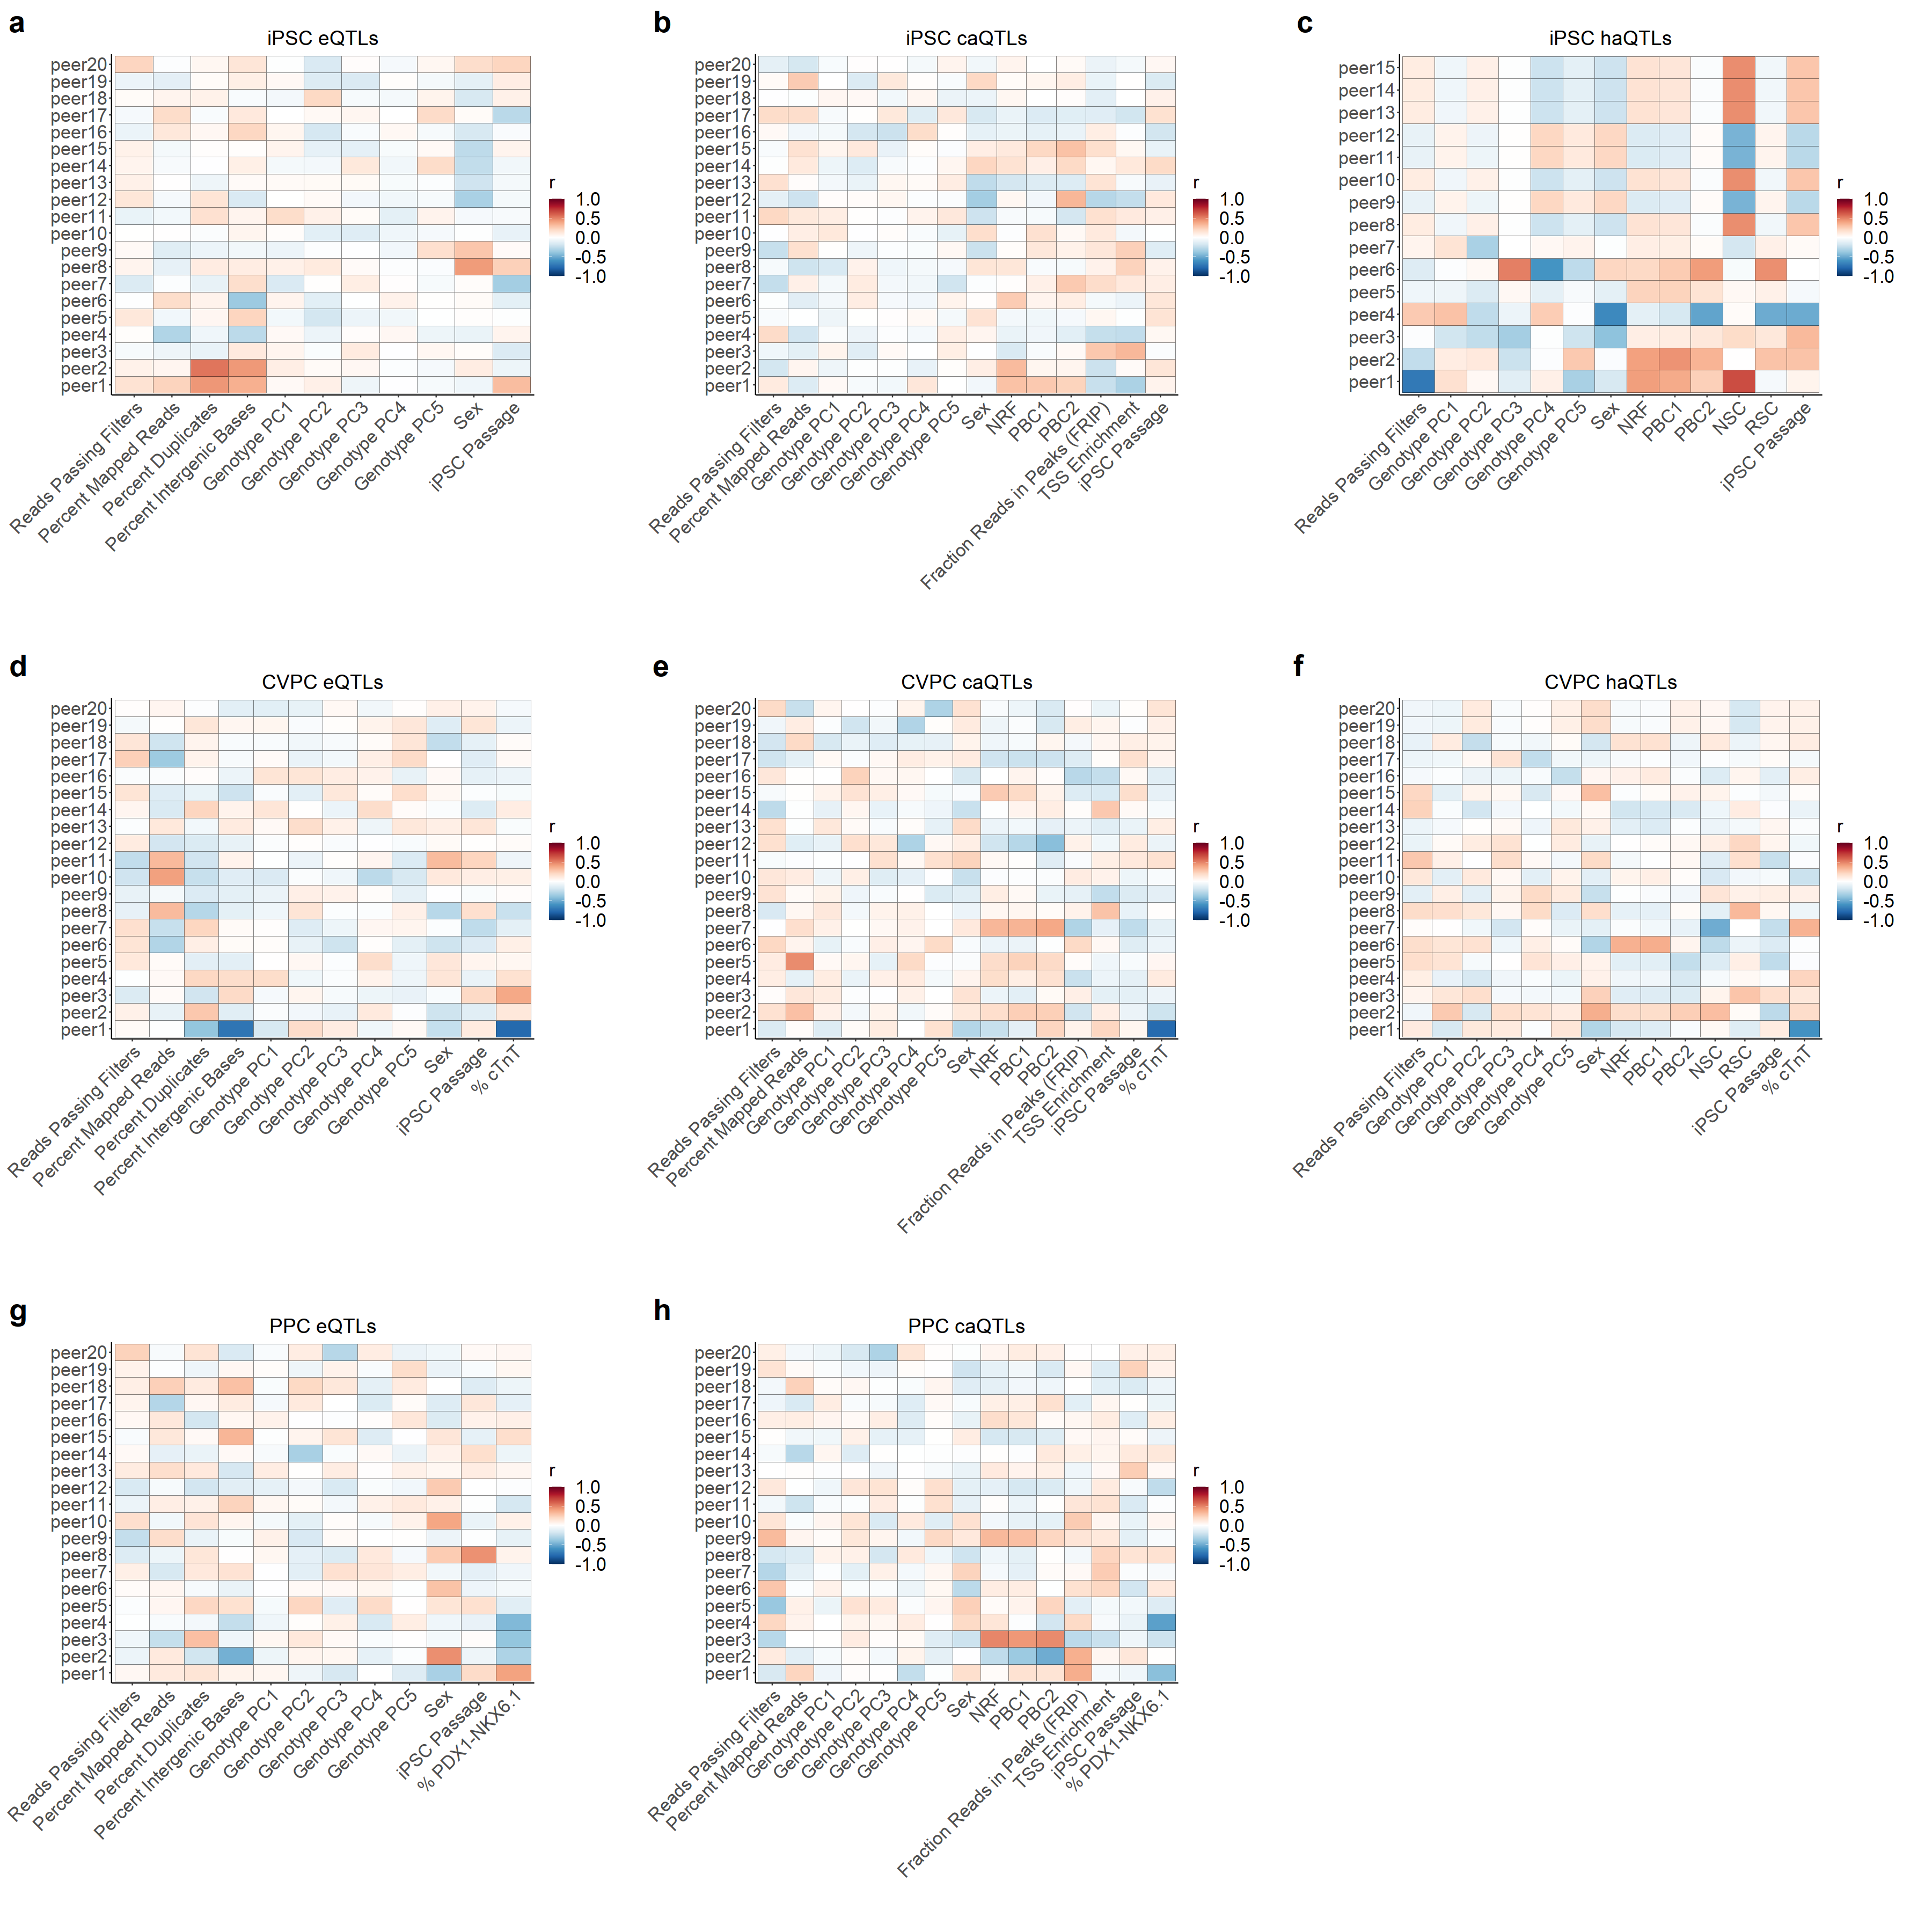

In [24]:
psize(w = 30, h = 30)
plot_grid(plotlist = plotlist[c(1, 4, 7, 2, 5, 8, 3, 6)], ncol = 3, align = "hv", 
          labels = c("a", "b", "c", "d", "e", "f", "g", "h"), label_size = 33)


In [18]:
# png("analyses/jennifer/figures/FigureSX_Peer_Corrplot.png", width = 12000, height = 12000, res = 400)
# plot_grid(plotlist = plotlist[c(1, 4, 7, 2, 5, 8, 3, 6)], ncol = 3, align = "hv", labels = c("a", "b", "c", "d", "e", "f", "g"), label_size = 33)
# dev.off()